########  (Kaggle)鐵達尼生存預測 https://www.kaggle.com/c/titanic ##########
# D17 什麼是Titanic dataset?   https://ithelp.ithome.com.tw/articles/10200327

In [1]:
# 準備資料
import pandas as pd

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])   #前半段為訓練資料, 後半段為測試資料, 合併一起進行資料整理
print("df_train.shape", df_train.shape)
print("df_test.shape", df_test .shape)
print(f'df.shape: {df.shape} , NOTE: 前{df_train.shape[0]}筆為訓練資料, \
接下來{df_test.shape[0]}筆為測試資料, 共有{df.shape[1]}個欄位(不包含 train_Y 和 ID)')
print(df.head())

df_train.shape (891, 10)
df_test.shape (418, 10)
df.shape: (1309, 10) , NOTE: 前891筆為訓練資料, 接下來418筆為測試資料, 共有10個欄位(不包含 train_Y 和 ID)
   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S  


# D18 列舉常見的特徵類型 : 
  ### 數值型特徵 / 類別型特徵；另外還有二元特徵、排序型特徵、時間型特徵。
  
# 「特徵工程」是將這些特徵的原始資料(可能是文字、數值等)轉換成對應的數值(調整過的分數、數字分組標籤等)。 
  ### 工程內容介紹可以參考 D19-D30範例。

In [2]:
#D18 檢視不同資料類型列表
# 秀出資料欄位的類型與數量
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

print(f'\n每個欄位有多少coding: pd.Series.nunique \n')
print(df.apply(pd.Series.nunique, axis = 0) )

3 Integer Features : ['Pclass', 'SibSp', 'Parch']

2 Float Features : ['Age', 'Fare']

5 Object Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

每個欄位有多少coding: pd.Series.nunique 

Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin        186
Embarked       3
dtype: int64


######################
## 數值型特徵
######################

各欄位Missing的量: 
Pclass      0
SibSp       0
Parch       0
Age       263
Fare        1
dtype: int64


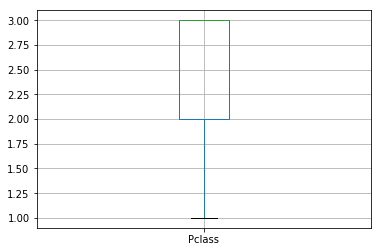

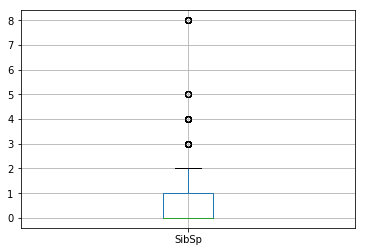

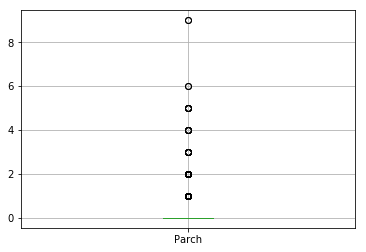

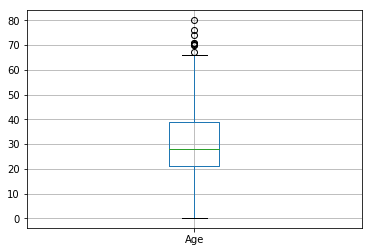

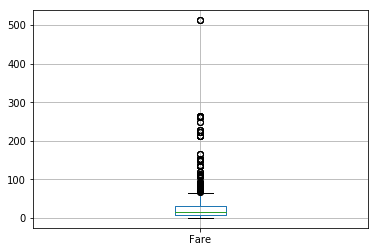

            Pclass        SibSp        Parch          Age         Fare
count  1309.000000  1309.000000  1309.000000  1046.000000  1308.000000
mean      2.294882     0.498854     0.385027    29.881138    33.295479
std       0.837836     1.041658     0.865560    14.413493    51.758668
min       1.000000     0.000000     0.000000     0.170000     0.000000
25%       2.000000     0.000000     0.000000    21.000000     7.895800
50%       3.000000     0.000000     0.000000    28.000000    14.454200
75%       3.000000     1.000000     0.000000    39.000000    31.275000
max       3.000000     8.000000     9.000000    80.000000   512.329200
調整mn_後cross_val_score: 0.6981761033723469
調整mn_MinMax後cross_val_score: 0.6993501991462476


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [4]:
#D19_數值型特徵 - 補缺失值與標準化
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 削減文字型欄位, 只剩數值型欄位
df_num = pd.concat((df[int_features], df[float_features]), axis=1)
print(f'各欄位Missing的量: \n{df_num.isnull().sum()}')  # 觀察 missing 狀況  , 只有 Age 和 Fare 有missing

#看分佈 BoxPlot
import matplotlib.pyplot as plt
# 檢視這些欄位的數值範圍
for col in df_num.columns:
    df_num[[col]].boxplot()
    plt.show()
print (df_num.describe())
print ( "=" *30)
######################################################
#試著兩種以上填補的缺值，看看何者比較好?
  #df_m1 = df.fillna(-1)   # 空值補 -1
  #df_0 = df.fillna(0)       # 空值補 0   
  #df_mn = df.fillna(df.mean()) # 空值補平均值mean、中位數median、眾數mode
#使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，何者效果最好?
  #df_MinMax = MinMaxScaler().fit_transform(df)     # 搭配最大最小化
  #df_Std = StandardScaler().fit_transform(df)     # 搭配標準化

# 利用LogisticRegression和cross_val_score預視結果:  
  #空值補平均值 
df_train_mn = df_num.fillna(df_num.mean())    # train_X = df_mn[:train_num] 
train_num = train_Y.shape[0]
train_X = df_train_mn[:train_num]  #取訓練料集 建模型
estimator = LogisticRegression()
print('調整mn_後cross_val_score:', cross_val_score(estimator, train_X, train_Y, cv=5).mean())


  #空值補平均值, 搭配最大最小化, 有較好結果
df_mn = df_num.fillna(df_num.mean())    # train_X = df_mn[:train_num] 
df_MinMax = MinMaxScaler().fit_transform(df_mn) #有一些特殊變數，如具有特殊意義，這類變數並不適合做標準化或其他Scaler，一般模型中需要統一使用同一種特徵縮放的方法
df_train_mnMinMax = pd.DataFrame(df_MinMax , columns=df_num.columns)
train_X = df_train_mnMinMax[:train_num]  #取訓練料集 建模型
estimator = LogisticRegression()
print('調整mn_MinMax後cross_val_score:', cross_val_score(estimator, train_X, train_Y, cv=5).mean())

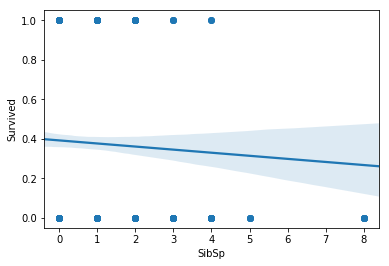

原始資料筆數: (891, 5)
捨棄離群值後筆數: (884, 5)


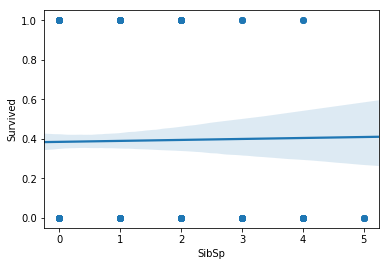

調整*捨棄離群值*後cross_val_score: 0.6924284984678243


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [5]:
#D20_數值型特徵-去除離群值
#試著限制 '鐵達尼號上的兄弟姊妹/配偶數量' (SibSp) 欄位的上下限, 看看能否再進一步提高分數?
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
train_num = train_Y.shape[0]
sns.regplot(x = df_mn['SibSp'][:train_num], y=train_Y)
plt.show()

# 將 SibSp 限制在 0 到 8 以內, 調整極端值在範圍內 [numpy.clip(a, a_min, a_max, out=None) 也就是說clip這個函數將將陣列中的元素x限制在a_min, a_max之間，大於a_max的就使得它等於 a_max，小於a_min,的就使得它等於a_min。]
  #df['SibSp'] = df['Fare'].clip(0, 8)  
# 將 SibSp 保留在 0 到 8 以內, 捨棄離群值
  #keep_indexs = (df['SibSp']> 0) & (df['SibSp']< 8)
  #df_keep = df[keep_indexs]
  #train_Y = train_Y[keep_indexs]
    
# 做迴歸, 觀察分數: 
   # 以平均值 補值，並將 SibSp 保留在 0 到 8 以內, 捨棄離群值
df_mn = df_num.fillna(df_num.mean())
df_train_mn=df_mn[:train_num]
print("原始資料筆數:", df_train_mn.shape)
keep_indexs = (df_train_mn['SibSp']>= 0) & (df_train_mn['SibSp']< 8)
df_keep = df_train_mn[keep_indexs]
print("捨棄離群值後筆數:", df_keep.shape)
train_Y_keep = train_Y[keep_indexs]
sns.regplot(x = df_keep['SibSp'], y=train_Y_keep)
plt.show()

train_X_keep = df_keep  #取訓練料集 建模型
estimator = LogisticRegression()
print('調整*捨棄離群值*後cross_val_score:', cross_val_score(estimator, train_X_keep, train_Y_keep, cv=5).mean())

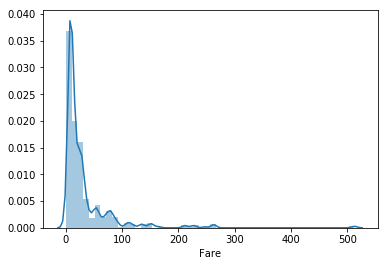

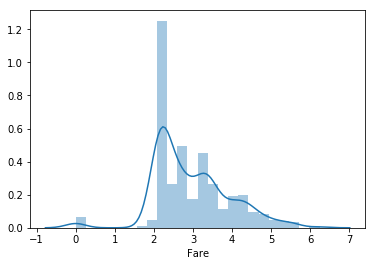

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

調整log1p後cross_val_score: 0.7038383040988557


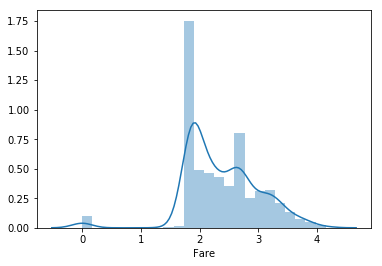

調整boxcox0後cross_val_score: 0.7027336816575154


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [6]:
#D21_數值型特徵-去除偏態
# 顯示 Fare 與目標值的散佈圖
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Fare'][:train_num])
plt.show()


# 將 Fare 取 log1p [[ log1p = log（x+1）]]後, 看散佈圖, 並計算分數:
 #df_fixed['Fare'] = np.log1p(df_fixed['Fare'])
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數  
 #面對有數值=0 的情況，修正方式 : 加入下面這一行, 使最小值大於 0, 類似log1p的概念
 #df_fixed['Fare'] = df_fixed['Fare'] + 1  
 #df_fixed['Fare'] = stats.boxcox(df_fixed['Fare'])[0]
    

# 將 Fare 取 log1p [[ log1p = log（x+1）]]後, 看散佈圖, 並計算分數:
   # 以平均值 補值， 
df_mn = df_num.fillna(df_num.mean())
df_mn_log1p = copy.deepcopy(df_mn)       #複製獨立檔案出來 整理
df_mn_log1p['Fare'] = np.log1p(df_mn_log1p['Fare'])
sns.distplot(df_mn_log1p['Fare'][:train_num])
plt.show()

train_X = df_mn_log1p[:train_num]
estimator = LogisticRegression()
print('調整log1p後cross_val_score:', cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 將 Fare 取 boxcox (lambda=0) [[即 log]] 後, 看散佈圖, 並計算分數  
   # 以平均值 補值， boxcox說明見 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
df_mn = df_num.fillna(df_num.mean())
df_mn_boxcox = copy.deepcopy(df_mn)       #複製獨立檔案出來 整理
from scipy import stats
df_mn_boxcox['Fare'] = df_mn_boxcox['Fare'] + 1  #Data must be positive. 面對有數值=0 的情況，修正方式 : 加入下面這一行, 使最小值大於 0, 類似log1p的概念
df_mn_boxcox['Fare'] = stats.boxcox(df_mn_boxcox['Fare'])[0]  # Box-Cox power transformed array取第一筆的統計資料
    #If lmbda is None, find the lambda that maximizes the log-likelihood function and return it as the second output argument.
sns.distplot(df_mn_boxcox['Fare'][:train_num])
plt.show()

train_X = df_mn_boxcox[:train_num]
estimator = LogisticRegression()
print('調整boxcox0後cross_val_score:', cross_val_score(estimator, train_X, train_Y, cv=5).mean())

In [7]:
# 3 Integer Features : ['Pclass', 'SibSp', 'Parch'] 
# pclass 購票分級  
# sibsp 鐵達尼號上的兄弟姊妹/配偶數量
# parch 鐵達尼號上的雙親/子女數量

print(f"df['Pclass'] \n{df['Pclass'].value_counts()}")
print(f"df['SibSp'] \n{df['SibSp'].value_counts()}")
print(f"df['Parch'] \n{df['Parch'].value_counts()}")

# 思考: 這三個整數變數，是否為類別變數呢？ 是否考慮分組來分析？

df['Pclass'] 
3    709
1    323
2    277
Name: Pclass, dtype: int64
df['SibSp'] 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
df['Parch'] 
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64


######################
## 類別型特徵
######################

In [8]:
#D22_類別型特徵 - 標籤編碼、獨熱編碼
# 只留類別型欄位
df_obj = df[object_features]
print(f'各欄位Missing的量: \n{df_obj.isnull().sum()}')  # 觀察 missing 狀況  , 只有 Cabin 和 Embarked 有missing
#補值
df_obj = df_obj.fillna('None')
train_num = train_Y.shape[0]
print (df_obj.head())

from sklearn.preprocessing import LabelEncoder
# LabelEncoder 標籤編碼 + 羅吉斯迴歸
print(f'\n ========== \n LabelEncoder 標籤編碼 + 羅吉斯迴歸')
df_temp = pd.DataFrame()
for c in df_obj.columns:
    df_temp[c] = LabelEncoder().fit_transform(df_obj[c])
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')

# One Hot Encoding 獨熱編碼 + 羅吉斯迴歸
print(f'\n ========== \n One Hot Encoding 獨熱編碼 + 羅吉斯迴歸')
df_temp = pd.get_dummies(df_obj)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')



#D23_類別型特徵 - 均值編碼 
# Mean Encoding 均值編碼 + 羅吉斯迴歸
print(f'\n ========== \n Mean Encoding 均值編碼 + 羅吉斯迴歸')
df_temp = pd.concat([df_obj[:train_num], train_Y], axis=1)
for c in df_obj.columns:
    mean_df = df_temp.groupby([c])['Survived'].mean().reset_index()
    mean_df.columns = [c, f'{c}_mean']
    df_temp = pd.merge(df_temp, mean_df, on=c, how='left')
    df_temp = df_temp.drop([c] , axis=1)
train_X = df_temp.drop(['Survived', 'Name_mean', 'Ticket_mean'] , axis=1)
estimator = LogisticRegression()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'Note:  因為Name與Ticket兩個欄位的種類數眾多, 如果均值編碼時加入這裡個欄位的均值會過擬合(overfitting), 因此程式碼中，需要先移除這兩個欄位，再做均值編碼')

#D23_類別型特徵 - 計數編碼、特徵雜湊
# 加上 'Cabin' 欄位的計數編碼
print(f'\n \n ========== ==========\n ========== ========== \n加上 Cabin 欄位的計數編碼 \n')
count_df = df_obj.groupby(['Cabin'])['Name'].agg({'Cabin_Count':'size'}).reset_index()
count_df = pd.merge(df_obj, count_df, on=['Cabin'], how='left')
print(count_df.sort_values(by=['Cabin_Count'], ascending=False).head(10))



# Counting 計數編碼 + 邏輯斯迴歸
print(f'\n ========== \n Counting 計數編碼 + 羅吉斯迴歸')
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(count_df[c])
df_temp['Cabin_Count'] = count_df['Cabin_Count']
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# Feature Hash特徵雜湊 + 邏輯斯迴歸
df_temp = pd.DataFrame()
print(f'\n ========== \n Feature Hash特徵雜湊 + 羅吉斯迴歸')
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(count_df[c])
df_temp['Cabin_Hash'] = count_df['Cabin'].map(lambda x:hash(x) % 5)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 計數編碼 + 特徵雜湊 + 邏輯斯迴歸
print(f'\n ========== \n 計數編碼 + 特徵雜湊 + 羅吉斯迴歸')
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(count_df[c])
df_temp['Cabin_Hash'] = count_df['Cabin'].map(lambda x:hash(x) % 5)
df_temp['Cabin_Count'] = count_df['Cabin_Count']
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
print(f'\n計數編碼 + 特徵雜湊DATA \n {df_temp.head(10)}')

各欄位Missing的量: 
Name           0
Sex            0
Ticket         0
Cabin       1014
Embarked       2
dtype: int64
                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171  None        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282  None        S  
3            113803  C123        S  
4            373450  None        S  

 LabelEncoder 標籤編碼 + 羅吉斯迴歸
shape : (891, 5)
score : 0.780004837244799

 One Hot Encoding 獨熱編碼 + 羅吉斯迴歸
shape : (891, 2429)
score : 0.8013346043513216

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs



 Mean Encoding 均值編碼 + 羅吉斯迴歸
shape : (891, 3)
score : 0.8350366889413987
Note:  因為Name與Ticket兩個欄位的種類數眾多, 如果均值編碼時加入這裡個欄位的均值會過擬合(overfitting), 因此程式碼中，需要先移除這兩個欄位，再做均值編碼

 
 ========== ==========
 ========== ========== 
加上 Cabin 欄位的計數編碼 

                                        Name     Sex           Ticket Cabin  \
0                    Braund, Mr. Owen Harris    male        A/5 21171  None   
822          Reuchlin, Jonkheer. John George    male            19972  None   
830  Yasbeck, Mrs. Antoni (Selini Alexander)  female             2659  None   
828             McCormack, Mr. Thomas Joseph    male           367228  None   
827                    Mallet, Master. Andre    male  S.C./PARIS 2079  None   
826                             Lam, Mr. Len    male             1601  None   
825                          Flynn, Mr. John    male           368323  None   
824             Panula, Master. Urho Abraham    male          3101295  None   
821                        Lulic, Mr. Nikola    male 

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [10]:
# Day_027_特徵組合 - 類別與數值組合「群聚編碼」
#試著使用鐵達尼號的例子，創立兩種以上的群聚編碼特徵( mean、median、mode、max、min、count 均可 )
import copy
df_Copy=copy.deepcopy(df)
# 取船票票號(Ticket), 對乘客年齡(Age)做群聚編碼
df_Copy['Ticket'] = df_Copy['Ticket'].fillna('None')
df_Copy['Age'] = df_Copy['Age'].fillna(df_Copy['Age'].mean())

mean_df = df_Copy.groupby(['Ticket'])['Age'].mean().reset_index()
mode_df = df_Copy.groupby(['Ticket'])['Age'].apply(lambda x: x.mode()[0]).reset_index()
median_df = df_Copy.groupby(['Ticket'])['Age'].median().reset_index()
max_df = df_Copy.groupby(['Ticket'])['Age'].max().reset_index()
min_df = df_Copy.groupby(['Ticket'])['Age'].min().reset_index()
temp = pd.merge(mean_df, mode_df, how='left', on=['Ticket'])
temp = pd.merge(temp, median_df, how='left', on=['Ticket'])
temp = pd.merge(temp, max_df, how='left', on=['Ticket'])
temp = pd.merge(temp, min_df, how='left', on=['Ticket'])
temp.columns = ['Ticket', 'Age_Mean', 'Age_Mode', 'Age_Median', 'Age_Max', 'Age_Min']
temp.head()

,Ticket,Age_Mean,Age_Mode,Age_Median,Age_Max,Age_Min
0,110152,26.333333,16.000000,30.000000,33.0,16.000000
1,110413,36.333333,18.000000,39.000000,52.0,18.000000
2,110465,38.440569,29.881138,38.440569,47.0,29.881138
3,110469,30.000000,30.000000,30.000000,30.0,30.000000
4,110489,42.000000,42.000000,42.000000,42.0,42.000000


In [11]:
df_Copy = pd.merge(df_Copy, temp, how='left', on=['Ticket'])
df_Copy = df_Copy.drop(['Ticket'] , axis=1)
df_Copy.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Mean,Age_Mode,Age_Median,Age_Max,Age_Min
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,22.0,22.0,22.0,22.0,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,38.5,38.0,38.5,39.0,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,26.0,26.0,26.0,26.0,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,36.0,35.0,36.0,37.0,35.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,35.0,35.0,35.0,35.0,35.0


In [11]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df_Copy.dtypes, df_Copy.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df_Copy_num = df_Copy[num_features]
df_Copy_1 = df_Copy_num.fillna(-1)
df_Copy_1.head()

10 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_Mean', 'Age_Mode', 'Age_Median', 'Age_Max', 'Age_Min']



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 新特徵 + 邏輯斯迴歸
df_CopyMinMax = MinMaxScaler().fit_transform(df_Copy_1)
train_num = train_Y.shape[0]
train_X = df_CopyMinMax[:train_num] 
estimator = LogisticRegression()

print(f'\n ========== \n 調整類別與數值組合「群聚編碼」 + 羅吉斯迴歸')
print(f' 取船票票號(Ticket), 對乘客年齡(Age)做群聚編碼後cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())



 調整類別與數值組合「群聚編碼」 + 羅吉斯迴歸
 取船票票號(Ticket), 對乘客年齡(Age)做群聚編碼後cross_val_score:
 0.7060727991156779


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be change

#### Day_025_DayTime_Features_日週期本例先跳過，見PART II
#### Day_026_特徵組合 - 數值與數值組合，見PART II
#### Day_028_特徵選擇: 有 三大類 方法
   - 過濾法 (Filter) : 選定統計數值與設定門檻，刪除低於門檻的特徵  《相關係數過濾法》
   - 包裝法 (Wrapper) : 根據目標函數，逐步加入特徵或刪除特徵
   - 嵌入法 (Embedded) : 使用機器學習模型，根據擬合後的係數，刪除係數低於門檻的特徵 《L1(Lasso)嵌入法，GDBT(梯度提升樹)嵌入法》

######################
## 特徵選擇
######################

一、過濾法 (Filter) : 選定統計數值與設定門檻，刪除低於門檻的特徵 《相關係數過濾法》

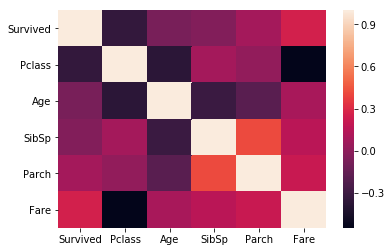

In [12]:
#Day_028_Feature_Selection_Ans
data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_train_Copy=copy.deepcopy(df_train)

df_train_Copy = df_train_Copy.drop(['PassengerId'] , axis=1)
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_train_Copy.corr()
sns.heatmap(corr)
plt.show()

In [13]:
# 記得刪除 Y
df_train_Copy = df_train_Copy.drop(['Survived'] , axis=1)
df_Copy2 = pd.concat([df_train_Copy,df_test])   #前半段為訓練資料, 後半段為測試資料, 合併一起進行資料整理

#這邊沿用 Day_027 的檔案
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df_Copy2.dtypes, df_Copy2.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df_Copy2 = df_Copy2[num_features]
df_Copy2 = df_Copy2.fillna(-1)
df_Copy2.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?
> 由下述不同門檻可以發現, 相關係數有時候確實能成功提升準確度, 但篩選過頭會有反效果  
門檻的決定沒有一定的準則, 因此這個方法並不那麼好用

In [14]:
# 原始特徵 + 邏輯斯迴歸
print(f'\n ========== \n 原始特徵 + 邏輯斯迴歸')
df_CopyMinMax2 = MinMaxScaler().fit_transform(df_Copy2)
train_num = train_Y.shape[0]
train_X = df_CopyMinMax2[:train_num] 
estimator = LogisticRegression()
print(f' cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 篩選相關係數大於 0.05 或小於 -0.05 的特徵
print(f'\n ========== \n 0.05特徵 + 邏輯斯迴歸')
high_list = list(corr[(corr['Survived']>0.05) | (corr['Survived']<-0.05)].index)
high_list.pop(0)
print(' 篩選後留下的變數： ', high_list)
# 0.05特徵 + 邏輯斯迴歸
df_CopyMinMax2 = MinMaxScaler().fit_transform(df_Copy2[high_list])
train_num = train_Y.shape[0]
train_X = df_CopyMinMax2[:train_num] 
estimator = LogisticRegression()
print(f' 篩選相關係數大於 0.05 或小於 -0.05 特徵的cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 篩選相關係數大於 0.1 或小於 -0.1 的特徵
print(f'\n ========== \n 0.1特徵 + 邏輯斯迴歸')
high_list = list(corr[(corr['Survived']>0.1) | (corr['Survived']<-0.1)].index)
high_list.pop(0)
print(' 篩選後留下的變數： ', high_list)
# 0.1特徵 + 邏輯斯迴歸
df_CopyMinMax2 = MinMaxScaler().fit_transform(df_Copy2[high_list])
train_num = train_Y.shape[0]
train_X = df_CopyMinMax2[:train_num] 
estimator = LogisticRegression()
print(f' 篩選相關係數大於 0.1 或小於 -0.1 特徵的cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())



 原始特徵 + 邏輯斯迴歸
 cross_val_score:
 0.6971346062663598

 0.05特徵 + 邏輯斯迴歸
 篩選後留下的變數：  ['Pclass', 'Age', 'Parch', 'Fare']
 篩選相關係數大於 0.05 或小於 -0.05 特徵的cross_val_score:
 0.6993817972775959

 0.1特徵 + 邏輯斯迴歸
 篩選後留下的變數：  ['Pclass', 'Fare']
 篩選相關係數大於 0.1 或小於 -0.1 特徵的cross_val_score:
 0.6791567235397566


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be change

二、包裝法 (Wrapper) : 根據目標函數，逐步加入特徵或刪除特徵
- R筆記 – (18) Subsets & Shrinkage Regression (Stepwise & Lasso)
https://rpubs.com/skydome20/R-Note18-Subsets_Shrinkage_Methods

三、嵌入法 (Embedded) : 使用機器學習模型，根據擬合後的係數，刪除係數低於門檻的特徵 《L1(Lasso)嵌入法，GDBT(梯度提升樹)嵌入法》

* 承上，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?
> 範例中, 效果並不如顯著  
而且與相關係數法類似, L1 Embedding 也需要調整 alpha 值, 且沒有一定法則  
所以也並非好用的特徵篩選方式

In [15]:
from sklearn.linear_model import Lasso
L1_Reg = Lasso(alpha=0.005)
df_CopyMinMax2 = MinMaxScaler().fit_transform(df_Copy2)
train_num = train_Y.shape[0]
train_X = df_CopyMinMax2[:train_num] 
L1_Reg.fit(train_X, train_Y)
print(f' 根據目標函數，逐步加入特徵或刪除特徵L1_Reg.coef_', L1_Reg.coef_)

from itertools import compress
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
L1_list = list(compress(list(df_Copy2), list(L1_mask)))
print(' 篩選後留下的變數： ', L1_list)

# L1_Embedding 特徵 + 線性迴歸
df_CopyMinMax2 = MinMaxScaler().fit_transform(df_Copy2[L1_list])
train_num = train_Y.shape[0]
train_X = df_CopyMinMax2[:train_num] 
estimator = LogisticRegression()
print(f' L1_Embedding 特徵 + 線性迴歸的cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())


 根據目標函數，逐步加入特徵或刪除特徵L1_Reg.coef_ [-0.39123864 -0.13640466 -0.          0.          0.        ]
 篩選後留下的變數：  ['Pclass', 'Age']
 L1_Embedding 特徵 + 線性迴歸的cross_val_score:
 0.6847938159868103


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver wil

嵌入法 (Embedded) : 使用機器學習模型，根據擬合後的係數，刪除係數低於門檻的特徵 《GDBT(梯度提升樹)嵌入法》

In [16]:
#Day_029_Feature_Importance
df_Copy3=copy.deepcopy(df)

# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
for c in df_Copy3.columns:
    df_Copy3[c] = df_Copy3[c].fillna(-1)
    if df_Copy3[c].dtype == 'object':
        df_Copy3[c] = LabelEncoder().fit_transform(list(df_Copy3[c].values))
    df_Copy3[c] = MinMaxScaler().fit_transform(df_Copy3[c].values.reshape(-1, 1))
df_Copy3.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.118683,1.0,0.283951,0.125,0.0,0.775862,0.016072,0.000000,1.000000
1,0.0,0.218989,0.0,0.481481,0.125,0.0,0.879310,0.140813,0.575269,0.333333
2,1.0,0.400459,0.0,0.333333,0.000,0.0,0.984914,0.017387,0.000000,1.000000
3,0.0,0.323124,0.0,0.444444,0.125,0.0,0.070043,0.105390,0.381720,1.000000
4,1.0,0.016845,1.0,0.444444,0.000,0.0,0.699353,0.017630,0.000000,1.000000


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
train_num = train_Y.shape[0]
train_X = df_Copy3[:train_num] 
estimator = GradientBoostingClassifier()
estimator.fit(df_Copy3[:train_num] .values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.444196
Pclass      0.111908
Ticket      0.098053
Fare        0.088366
Name        0.080586
Age         0.074414
Cabin       0.070990
Embarked    0.012262
Parch       0.011519
SibSp       0.007706
dtype: float64

##用梯度提升機對鐵達尼生存預測做訓練
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?
> 雖然範例中, 看似高重要性特徵的預估正確率較差,  
但這是只使用一半特徵的結果, 表示高重要特徵的資訊密度是高的, 
使用較少特徵, 泛化能力(對外部資料預測力)也會提升,  
因此只要不要刪到一半那麼多, 仍可能是適當的特徵選擇方式  
另一個原因也可能是這邊的模型(GradientBoostingClassifier)並未經過調參, 所以特徵重要性排名較不準確導致

In [18]:
# 原始特徵 + 梯度提升樹
train_num = train_Y.shape[0]
train_X = df_Copy3[:train_num] 
estimator = GradientBoostingClassifier()
print(f' 原始特徵 + 梯度提升樹的cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())

# 高重要性特徵 + 梯度提升樹 
high_feature = list(feats[:5].index)
print(f' 高重要性特徵:', high_feature)
train_num = train_Y.shape[0]
train_X = df_Copy3[high_feature][:train_num] 
estimator = GradientBoostingClassifier()
print(f' 高重要性特徵 + 梯度提升樹 + 梯度提升樹的cross_val_score:\n', cross_val_score(estimator, train_X, train_Y, cv=5).mean())


 原始特徵 + 梯度提升樹的cross_val_score:
 0.8238381835223724
 高重要性特徵: ['Sex', 'Pclass', 'Ticket', 'Fare', 'Name']
 高重要性特徵 + 梯度提升樹 + 梯度提升樹的cross_val_score:
 0.8125895324717789


#### D30 葉編碼- 只有分類問題比較適合葉編碼

In [23]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# 因為擬合(fit)與編碼(transform)需要分開, 因此不使用.get_dummy, 而採用 sklearn 的 OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

df_Copy4=copy.deepcopy(df)
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
for c in df_Copy4.columns:
    df_Copy4[c] = df_Copy4[c].fillna(-1)
    if df_Copy4[c].dtype == 'object':
        df_Copy4[c] = LabelEncoder().fit_transform(list(df_Copy4[c].values))
    df_Copy4[c] = MinMaxScaler().fit_transform(df_Copy4[c].values.reshape(-1, 1))
print(df_Copy4.head())


train_num = train_Y.shape[0]
train_X = df_Copy4[:train_num].values
# 因為訓練邏輯斯迴歸時也要資料, 因此將訓練及切成三部分 train / val / test, 採用 test 驗證而非 k-fold 交叉驗證
# train 用來訓練梯度提升樹, val 用來訓練邏輯斯迴歸, test 驗證效果
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=0.5)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.5)

   Pclass      Name  Sex       Age  SibSp  Parch    Ticket      Fare  \
0     1.0  0.118683  1.0  0.283951  0.125    0.0  0.775862  0.016072   
1     0.0  0.218989  0.0  0.481481  0.125    0.0  0.879310  0.140813   
2     1.0  0.400459  0.0  0.333333  0.000    0.0  0.984914  0.017387   
3     0.0  0.323124  0.0  0.444444  0.125    0.0  0.070043  0.105390   
4     1.0  0.016845  1.0  0.444444  0.000    0.0  0.699353  0.017630   

      Cabin  Embarked  
0  0.000000  1.000000  
1  0.575269  0.333333  
2  0.000000  1.000000  
3  0.381720  1.000000  
4  0.000000  1.000000  


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with

In [67]:
# 梯度提升樹調整參數並擬合後, 再將葉編碼 (*.apply) 結果做獨熱 / 邏輯斯迴歸
# 調整參數的方式採用 RandomSearchCV 或 GridSearchCV, 以後的進度會再教給大家, 本次先直接使用調參結果
gdbt = GradientBoostingClassifier(subsample=0.93, n_estimators=320, min_samples_split=0.1, min_samples_leaf=0.3, 
                                  max_features=4, max_depth=4, learning_rate=0.16)
onehot = OneHotEncoder()
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

gdbt.fit(train_X, train_Y)
onehot.fit(gdbt.apply(train_X)[:, :, 0])
lr.fit(onehot.transform(gdbt.apply(val_X)[:, :, 0]), val_Y)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

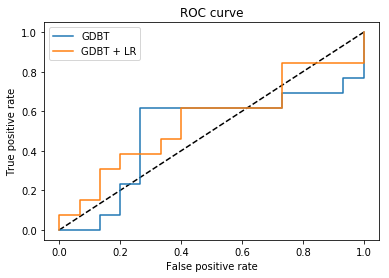

In [68]:
# 將梯度提升樹+葉編碼+邏輯斯迴歸結果輸出
pred_gdbt_lr = lr.predict_proba(onehot.transform(gdbt.apply(test_X)[:, :, 0]))[:, 1]
fpr_gdbt_lr, tpr_gdbt_lr, _ = roc_curve(test_Y, pred_gdbt_lr)
# 將梯度提升樹結果輸出
pred_gdbt = gdbt.predict_proba(test_X)[:, 1]
fpr_gdbt, tpr_gdbt, _ = roc_curve(test_Y, pred_gdbt)

import matplotlib.pyplot as plt
# 將結果繪圖
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gdbt, tpr_gdbt, label='GDBT')
plt.plot(fpr_gdbt_lr, tpr_gdbt_lr, label='GDBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [69]:
#完成隨機森林的鐵達尼生存率預測，以及對應的葉編碼+邏輯斯迴歸
rf = RandomForestClassifier(n_estimators=20, min_samples_split=10, min_samples_leaf=5, 
                            max_features=4, max_depth=3, bootstrap=True)
onehot = OneHotEncoder()
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rf.fit(train_X, train_Y)
onehot.fit(rf.apply(train_X))
lr.fit(onehot.transform(rf.apply(val_X)), val_Y)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

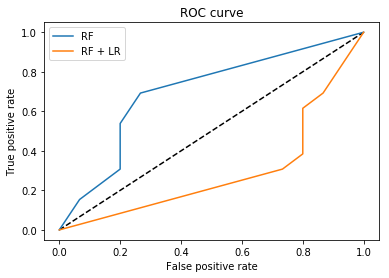

In [70]:
# 將隨機森林+葉編碼+邏輯斯迴歸結果輸出
pred_rf_lr = lr.predict_proba(onehot.transform(rf.apply(test_X)))[:, 1]
fpr_rf_lr, tpr_rf_lr, _ = roc_curve(test_Y, pred_rf_lr)
# 將隨機森林結果輸出
pred_rf = rf.predict_proba(test_X)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_Y, pred_rf)

import matplotlib.pyplot as plt
# 將結果繪圖
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lr, tpr_rf_lr, label='RF + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

* 上述的結果，葉編碼是否有提高預測的正確性呢?
> 以roc_auc而言(下圖), 看起來效果不是很明顯, 範例中的結果甚至反過來  
大家可以嘗試自己多跑幾次, 結果可能都有些差異  
所以葉編碼效果仍要看資料而定, 未必一定比較好, 而是提供多一個方式讓大家選擇